第一部分:    
https://segmentfault.com/a/1190000010871928  推荐看    
注意 所用的地图数据没有藏南地区    
第二部分:   
值得一看:   
https://segmentfault.com/a/1190000010900212   

注意:CHN_adm1 这个文件漏掉了台湾地区,bou2_4p没有漏掉.   


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection

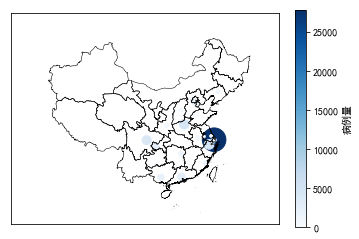

In [3]:

sheet1 = pd.read_excel('各单位地理位置分布.xlsx',sheet_name = 'Sheet1')
sheet1.head(10)
lat = sheet1['纬度'].values
lon = sheet1['经度'].values
bll = sheet1['病例量'].values
basemap = Basemap(llcrnrlon= 75,
                  llcrnrlat=10,
                  urcrnrlon=150,
                  urcrnrlat=55,
                  projection='poly',
                  lon_0 = 116.65,
                  lat_0 = 40.02,
                  resolution='l')

# basemap.shadedrelief()
basemap.readshapefile(shapefile = "./bou2_4p",name = "china")
# basemap.drawcountries(color='#cccccc') # 画出其他国家
# basemap.scatter(lon,lat,latlon = True,c = bll,cmap='Reds', alpha=0.95)
# alpha表示透明度
size=(bll/(50))
basemap.scatter(lon,lat,latlon = True,c = bll, s = size,cmap='Blues')
# c 代表数值,对应了颜色深浅
# s 代表了散点的大小

plt.colorbar(label='病例量')
# plt.clim(3, 7)
# # 调整colorbar的显示数值的范围
plt.show()

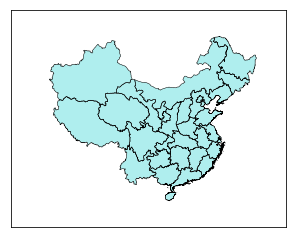

In [9]:
# 上色
from matplotlib.patches import Polygon
basemap.readshapefile('CHN_adm_shp/CHN_adm1','states',drawbounds=True)
ax = plt.gca()
# gca就是Get Current Axes的缩写，实际上就是要获得当前图形的座标轴
for idx, seg in enumerate(basemap.states):
    poly = Polygon(seg, facecolor='#afeeee')
    ax.add_patch(poly)

In [ ]:
basemap.readshapefile('TWN_adm_shp/TWN_adm0', 'taiwan', drawbounds=True)
for idx, seg in enumerate(basemap.taiwan):
    poly = Polygon(seg, facecolor='#afeeee')
    ax.add_patch(poly)

In [13]:
output_buffer = []
for shapedict in basemap.states_info:
    statename = shapedict['NL_NAME_1']
    p = statename.split('|')
    if len(p) > 1:
        s = p[1]
    else:
        s = p[0]
    output_buffer.append(s)
print(output_buffer[:50])

'''
for shapedict in basemap.taiwan_info:
    s = shapedict['NAME_CHINE']
    print(s)
'''

['安徽', '北京', '重庆', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建', '福建']


"\nfor shapedict in basemap.taiwan_info:\n    s = shapedict['NAME_CHINE']\n    print(s)\n"

完整代码

E:\conda\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in sqrt
E:\conda\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)
E:\conda\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in sqrt


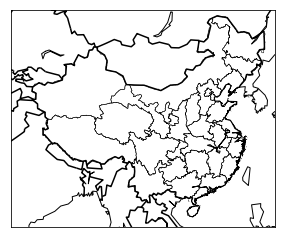

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
import numpy as np


# plt.figure(figsize=(16,8))
m = Basemap(
    llcrnrlon=77,
    llcrnrlat=14,
    urcrnrlon=140,
    urcrnrlat=51,
    projection='lcc',
    lat_1=33,
    lat_2=45,
    lon_0=100
)
m.drawcountries(linewidth=1.5)
m.drawcoastlines()

m.readshapefile('CHN_adm_shp/CHN_adm1', 'states', drawbounds=True)

sheet1 = pd.read_excel('各单位地理位置分布.xlsx',sheet_name = 'Sheet1')
lat = sheet1['纬度'].values
lon = sheet1['经度'].values
bll = sheet1['病例量'].values
province = sheet1['省'].values

province2bll = {}
for idx in range(len(province)):
    province2bll[province[idx]] = bll[idx]
    
statenames=[]
colors={}
vmax = 100000000
vmin = 3000000
cmap = plt.cm.YlOrRd
for shapedict in m.states_info:
    statename = shapedict['NL_NAME_1']
    p = statename.split('|')
    if len(p) > 1:
        s = p[1]
    else:
        s = p[0]
    s = s[:2]
    
    if s == '黑龍':
        s = '黑龙'   
    statenames.append(s)
    
    tmp = s + '省'
    if tmp in province2bll:
        bll_ = province2bll[tmp]
        colors[tmp] = cmap(np.sqrt((bll_ - vmin) / (vmax - vmin)))[:3]
        
    tmp = s + '市'
    if tmp in province2bll:
        bll_ = province2bll[tmp]
        colors[tmp] = cmap(np.sqrt((bll_ - vmin) / (vmax - vmin)))[:3]


# print(statenames)

ax = plt.gca()
for idx, seg in enumerate(m.states):
    if statenames[idx] in colors:
        color = rgb2hex(colors[statenames[idx]])
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)
plt.show()

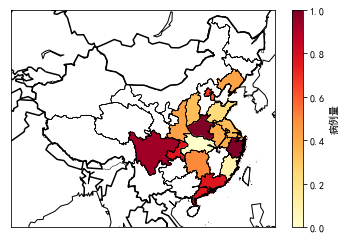

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd

%matplotlib inline
# plt.figure(figsize=(16, 8))
m = Basemap(
    llcrnrlon=77,
    llcrnrlat=14,
    urcrnrlon=140,
    urcrnrlat=51,
    projection='lcc',
    lat_1=33,
    lat_2=45,
    lon_0=100
)
m.drawcountries(linewidth=1.5)
m.drawcoastlines()


m.readshapefile('CHN_adm_shp/CHN_adm1', 'states', drawbounds=True)
m.readshapefile(shapefile="./bou2_4p", name="china")

sheet1 = pd.read_excel('各单位地理位置分布.xlsx', sheet_name='Sheet1')
lat = sheet1['纬度'].values
lon = sheet1['经度'].values
bll = sheet1['病例量'].values
province = sheet1['省'].values

province2bll = {}
for idx in range(len(province)):
    province2bll[province[idx]] = bll[idx]

statenames = []
colors = {}
# 根据具体数据确定 vmax 和vmin

vmax = max(list(province2bll.values()))
vmin = min(list(province2bll.values()))
cmap = plt.cm.YlOrRd
for shapedict in m.states_info:
    statename = shapedict['NL_NAME_1']
    p = statename.split('|')
    if len(p) > 1:
        s = p[1]
    else:
        s = p[0]
    s = s[:2]

    if s == '黑龍':
        s = '黑龙'
    statenames.append(s)

    tmp = s + '省'
    if tmp in province2bll:
        bll_ = province2bll[tmp]
        colors[tmp] = list(cmap(np.sqrt((bll_ - vmin) / (vmax - vmin)))[:3])
        # print(cmap(np.sqrt((bll_ - vmin) / (vmax - vmin)))[:3])
        # break

    tmp = s + '市'
    if tmp in province2bll:
        bll_ = province2bll[tmp]
        colors[tmp] = cmap(np.sqrt((bll_ - vmin) / (vmax - vmin)))[:3]



ax = plt.gca()
for idx, seg in enumerate(m.states):
    if statenames[idx] + '市' in colors:
        s = statenames[idx] + '市'
        color = rgb2hex(colors[s])
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)
    elif statenames[idx] + '省' in colors:
        s = statenames[idx] + '省'
        color = rgb2hex(colors[s])
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)



sm = plt.cm.ScalarMappable(cmap=cmap)
sm._A = []
# plt.colorbar(sm, shrink=0.85, label='病例量')
# plt.clim(vmin, vmax)
plt.colorbar(sm, label='病例量')
plt.show()

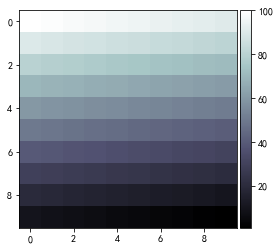

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

data = np.arange(100, 0, -1).reshape(10, 10)

fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax.imshow(data, cmap='bone')

fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

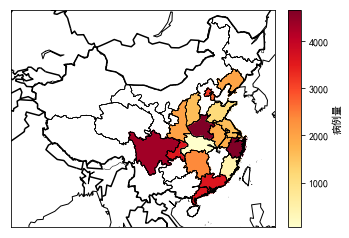

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd


# plt.figure(figsize=(16, 8))
m = Basemap(
    llcrnrlon=77,
    llcrnrlat=14,
    urcrnrlon=140,
    urcrnrlat=51,
    projection='lcc',
    lat_1=33,
    lat_2=45,
    lon_0=100
)
m.drawcountries(linewidth=1.5)
m.drawcoastlines()


m.readshapefile('CHN_adm_shp/CHN_adm1', 'states', drawbounds=True)
m.readshapefile(shapefile="./bou2_4p", name="china")

sheet1 = pd.read_excel('各单位地理位置分布.xlsx', sheet_name='Sheet1')
lat = sheet1['纬度'].values
lon = sheet1['经度'].values
bll = sheet1['病例量'].values
province = sheet1['省'].values

province2bll = {}
for idx in range(len(province)):
    province2bll[province[idx]] = bll[idx]

statenames = []
colors = {}
# 根据具体数据确定 vmax 和vmin

vmax = max(list(province2bll.values()))
vmin = min(list(province2bll.values()))
cmap = plt.cm.YlOrRd
for shapedict in m.states_info:
    statename = shapedict['NL_NAME_1']
    p = statename.split('|')
    if len(p) > 1:
        s = p[1]
    else:
        s = p[0]
    s = s[:2]

    if s == '黑龍':
        s = '黑龙'
    statenames.append(s)

    tmp = s + '省'
    if tmp in province2bll:
        bll_ = province2bll[tmp]
        colors[tmp] = list(cmap(np.sqrt((bll_ - vmin) / (vmax - vmin)))[:3])
        # print(cmap(np.sqrt((bll_ - vmin) / (vmax - vmin)))[:3])
        # break

    tmp = s + '市'
    if tmp in province2bll:
        bll_ = province2bll[tmp]
        colors[tmp] = cmap(np.sqrt((bll_ - vmin) / (vmax - vmin)))[:3]



ax = plt.gca()
for idx, seg in enumerate(m.states):
    if statenames[idx] + '市' in colors:
        s = statenames[idx] + '市'
        color = rgb2hex(colors[s])
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)
    elif statenames[idx] + '省' in colors:
        s = statenames[idx] + '省'
        color = rgb2hex(colors[s])
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)


# 为了产生cs,加一个无数据的散点图
cs = m.scatter([], [], [], [], cmap=cmap)
# add colorbar.
cbar = m.colorbar(cs, location='right', pad="5%")
cbar.set_label('病例量')
plt.clim(vmin,vmax)
plt.show()


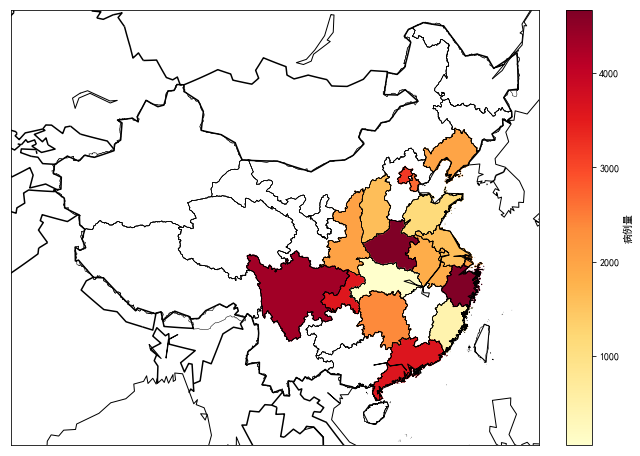

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd


plt.figure(figsize=(16, 8))
m = Basemap(
    llcrnrlon=77,
    llcrnrlat=14,
    urcrnrlon=140,
    urcrnrlat=51,
    projection='lcc',
    lat_1=33,
    lat_2=45,
    lon_0=100
)
m.drawcountries(linewidth=1.5)
m.drawcoastlines()


m.readshapefile('CHN_adm_shp/CHN_adm1', 'states', drawbounds=True)
m.readshapefile(shapefile="./bou2_4p", name="china")

sheet1 = pd.read_excel('各单位地理位置分布.xlsx', sheet_name='Sheet1')
lat = sheet1['纬度'].values
lon = sheet1['经度'].values
bll = sheet1['病例量'].values
province = sheet1['省'].values

province2bll = {}
for idx in range(len(province)):
    province2bll[province[idx]] = bll[idx]

statenames = []
colors = {}
# 根据具体数据确定 vmax 和vmin

vmax = max(list(province2bll.values()))
vmin = min(list(province2bll.values()))
cmap = plt.cm.YlOrRd
for shapedict in m.states_info:
    statename = shapedict['NL_NAME_1']
    p = statename.split('|')
    if len(p) > 1:
        s = p[1]
    else:
        s = p[0]
    s = s[:2]

    if s == '黑龍':
        s = '黑龙'
    statenames.append(s)

    tmp = s + '省'
    if tmp in province2bll:
        bll_ = province2bll[tmp]
        colors[tmp] = list(cmap(np.sqrt((bll_ - vmin) / (vmax - vmin)))[:3])
        # print(cmap(np.sqrt((bll_ - vmin) / (vmax - vmin)))[:3])
        # break

    tmp = s + '市'
    if tmp in province2bll:
        bll_ = province2bll[tmp]
        colors[tmp] = cmap(np.sqrt((bll_ - vmin) / (vmax - vmin)))[:3]



ax = plt.gca()
for idx, seg in enumerate(m.states):
    if statenames[idx] + '市' in colors:
        s = statenames[idx] + '市'
        color = rgb2hex(colors[s])
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)
    elif statenames[idx] + '省' in colors:
        s = statenames[idx] + '省'
        color = rgb2hex(colors[s])
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)


# 为了产生cs,加一个无数据的散点图
cs = m.scatter([], [], [], [], cmap=cmap)
# add colorbar.
cbar = m.colorbar(cs, location='right', pad="5%")
cbar.set_label('病例量')
plt.clim(vmin,vmax)
plt.show()

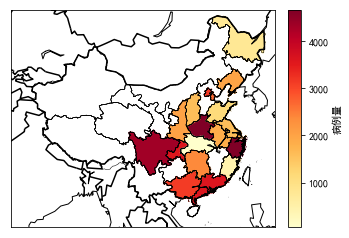

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd

# 上个图漏了一些地区,这个图修正了

# plt.figure(figsize=(16, 8))
m = Basemap(
    llcrnrlon=77,
    llcrnrlat=14,
    urcrnrlon=140,
    urcrnrlat=51,
    projection='lcc',
    lat_1=33,
    lat_2=45,
    lon_0=100
)
m.drawcountries(linewidth=1.5)
m.drawcoastlines()


m.readshapefile('CHN_adm_shp/CHN_adm1', 'states', drawbounds=True)
m.readshapefile(shapefile="./bou2_4p", name="china")

sheet1 = pd.read_excel('各单位地理位置分布.xlsx', sheet_name='Sheet1')
lat = sheet1['纬度'].values
lon = sheet1['经度'].values
bll = sheet1['病例量'].values
province = sheet1['省'].values

province2bll = {}
for idx in range(len(province)):
    province2bll[province[idx]] = bll[idx]

statenames = []
colors = {}
# 根据具体数据确定 vmax 和vmin

vmax = max(list(province2bll.values()))
vmin = min(list(province2bll.values()))
cmap = plt.cm.YlOrRd
for shapedict in m.states_info:
    statename = shapedict['NL_NAME_1']
    p = statename.split('|')
    if len(p) > 1:
        s = p[1]
    else:
        s = p[0]
    s = s[:2]

    if s == '黑龍':
        s = '黑龙'
    statenames.append(s)


for province,bll in province2bll.items():
    if province[:2] in statenames:
        colors[province[:2]] = list(cmap(np.sqrt((bll - vmin) / (vmax - vmin)))[:3])




ax = plt.gca()
for idx, seg in enumerate(m.states):
    s = statenames[idx]
    if s in colors:
        color = rgb2hex(colors[s])
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)



# 为了产生cs,加一个无数据的散点图
cs = m.scatter([], [], [], [], cmap=cmap)
# add colorbar.
cbar = m.colorbar(cs, location='right', pad="5%")
cbar.set_label('病例量')
plt.clim(vmin,vmax)
plt.show()





由于basemap应该不支持按华东地区,华北地区等上色.

可以考虑让属于华东地区的省份的病例量的值等于 华东地区病例量的总和,以此类推,然后再上色.


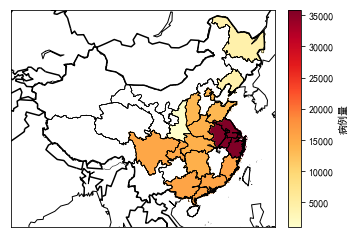

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd

# 上个图漏了一些地区,这个图修正了

# plt.figure(figsize=(16, 8)) # 设定图片大小
m = Basemap(
    llcrnrlon=77,
    llcrnrlat=14,
    urcrnrlon=140,
    urcrnrlat=51,
    projection='lcc',
    lat_1=33,
    lat_2=45,
    lon_0=100
)
m.drawcountries(linewidth=1.5)
m.drawcoastlines()


m.readshapefile('CHN_adm_shp/CHN_adm1', 'states', drawbounds=True)
m.readshapefile(shapefile="./bou2_4p", name="china")

sheet1 = pd.read_excel('各单位地理位置分布.xlsx', sheet_name='Sheet1')
lat = sheet1['纬度'].values
lon = sheet1['经度'].values
bll = sheet1['病例量'].values
province = sheet1['省'].values


sheet4 = pd.read_excel('各单位地理位置分布.xlsx', sheet_name='Sheet4')
province2num = {}
location2num = {}
province2location = {}
for _, row in sheet4.iterrows():
    k1 = '省'
    k2 = '病例量'
    k3 = '地区'
    province2location[row[k1]] = row[k3]
    if row[k1] in province2num:
        province2num[row[k1]] += row[k2]
    else:
        province2num[row[k1]] = row[k2]
    if row[k3] in location2num:
        location2num[row[k3]] += row[k2]
    else:
        location2num[row[k3]] = row[k2]

for province,_ in province2num.items():
    province2num[province] = location2num[province2location[province]]
        
province2bll = province2num

statenames = []
colors = {}
# 根据具体数据确定 vmax 和vmin

vmax = max(list(province2bll.values()))
vmin = min(list(province2bll.values()))
cmap = plt.cm.YlOrRd
for shapedict in m.states_info:
    statename = shapedict['NL_NAME_1']
    p = statename.split('|')
    if len(p) > 1:
        s = p[1]
    else:
        s = p[0]
    s = s[:2]

    if s == '黑龍':
        s = '黑龙'
    statenames.append(s)


for province,bll in province2bll.items():
    if province[:2] in statenames:
        colors[province[:2]] = list(cmap(np.sqrt((bll - vmin) / (vmax - vmin)))[:3])




ax = plt.gca()
for idx, seg in enumerate(m.states):
    s = statenames[idx]
    if s in colors:
        color = rgb2hex(colors[s])
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)



# 为了产生cs,加一个无数据的散点图
cs = m.scatter([], [], [], [], cmap=cmap)
# add colorbar.
cbar = m.colorbar(cs, location='right', pad="5%")
cbar.set_label('病例量')
plt.clim(vmin,vmax)
plt.show()



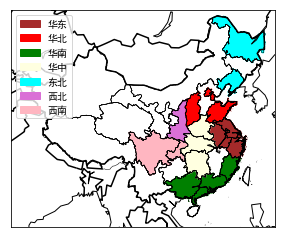

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.patches as mpatches
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
%matplotlib inline
m = Basemap(
    llcrnrlon=77,
    llcrnrlat=14,
    urcrnrlon=140,
    urcrnrlat=51,
    projection='lcc',
    lat_1=33,
    lat_2=45,
    lon_0=100
)
m.drawcountries(linewidth=1.5)
m.drawcoastlines()

m.readshapefile(shapefile="./bou2_4p", name="china")
m.readshapefile('CHN_adm_shp/CHN_adm1', 'states', drawbounds=True)

sheet4 = pd.read_excel('各单位地理位置分布.xlsx', sheet_name='Sheet4')
province2num = {}
location2num = {}
province2location = {}

for province,_ in province2num.items():
    province2num[province] = location2num[province2location[province]]
        
province2bll = province2num
statenames = []
for shapedict in m.states_info:
    statename = shapedict['NL_NAME_1']
    p = statename.split('|')
    if len(p) > 1:
        s = p[1]
    else:
        s = p[0]
    s = s[:2]
    if s == '黑龍':
        s = '黑龙'
    statenames.append(s)

colors = {}
# https://matplotlib.org/examples/color/named_colors.html
location_colors = {
    '华东': 'brown', 
    '华北': 'r', 
    '华南': 'g',
    '华中': 'lightyellow',
    '东北': 'cyan', 
    '西北': 'orchid',
    '西南': 'lightpink'
}

for _, row in sheet4.iterrows():
    k1 = '省'
    k2 = '地区'
    colors[row[k1][:2]] = location_colors[row[k2]]

ax = plt.gca()
for idx, seg in enumerate(m.states):
    s = statenames[idx]
    if s in colors:
        color = colors[s]
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)

patchs = []
for location,color in location_colors.items():
    patch = mpatches.Patch(color=color, label=location)
    patchs.append(patch)
    
plt.legend(handles=patchs)
plt.show()